## Sudoku

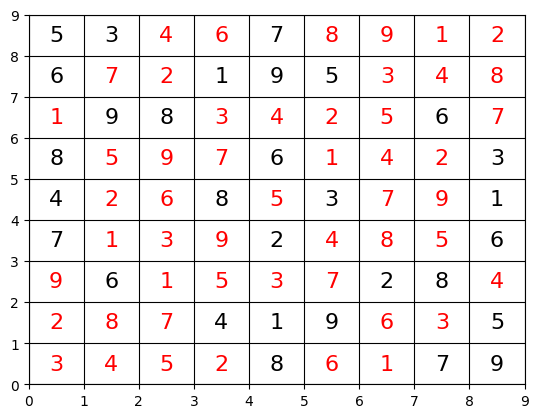

In [1]:
import numpy as np
import matplotlib.pyplot as plt

puzzle = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])


def search_sub_matrix(puzzle, i, j):
    h_start, h_end, v_start, v_end = None, None, None, None
    intervals = [range(0, 3), range(3, 6), range(6, 9)]
    for interval in intervals:
        if i in interval:
            h_start = interval.start
            h_end = interval.stop
        if j in interval:
            v_start = interval.start
            v_end = interval.stop
    return puzzle[h_start:h_end, v_start:v_end]


def solve(puzzle):
    # 第i行第j列
    for i in range(9):
        for j in range(9):
            sub_puzzle = search_sub_matrix(puzzle, i, j)
            if puzzle[i, j] == 0:
                for candidate_num in range(1, 10):
                    if (candidate_num not in puzzle[i, :] and 
                        candidate_num not in puzzle[:, j] and 
                        candidate_num not in sub_puzzle
                    ):
                        puzzle[i, j] = candidate_num
                        if solve(puzzle):
                            return True
                        else:
                            puzzle[i, j] = 0
                return False
    return True


def sudoku(puzzle):
    solve(puzzle)
    return puzzle


def show_result(original, solved):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_yticks(np.arange(0, 10, 1))
    ax.grid(True, color='black')
    
    for i in range(9):
        for j in range(9):
            num = solved[i, j]
            if original[i, j] == 0:
                color = "red"
            else:
                color = "black"
            ax.text(j + 0.5, 8.5 - i, str(num), color=color,
                    ha='center', va='center', fontsize=16)
            
    plt.show()
    
original = puzzle.copy()
solved = sudoku(puzzle)

show_result(original, solved)

## Points dans un carré

In [37]:
import numpy as np

side = 3
points = [[0,0], [0,1], [0,2], [0,3], [3,0], [3,1], [3,2], [3,3], [1,0], [2,0], [1,3], [2,3], [3,1], [3,2]]
k = 4

def manhattan(point1: list[int], point2: list[int]):
    return np.abs(point1[0] - point2[0]) + np.abs(point1[1] - point2[1])

def is_valid(candidate_list, min_distance):
    if len(candidate_list) == 1:
        return True
    
    for p in candidate_list[1:]:
        if manhattan(p, candidate_list[0]) < min_distance:
            return False
        
    return is_valid(candidate_list[1:], min_distance)

def subpoints(points, k):
    result = []
    path = []
    
    def backtrack(start):
        if len(path) == k:
            result.append(path[:])
            return
        for i in range(start, len(points)):
            path.append(points[i])
            backtrack(i+1)
            path.pop()
            
    backtrack(0)
    return result


def distance_and_points(candidate_lists):
    min_distance = 0
    while True:
        valid_candidates = []
        for candidate_list in candidate_lists:
            if is_valid(candidate_list, min_distance):
                valid_candidates.append(candidate_list)
        if not valid_candidates:
            min_distance -= 1
            return min_distance
            
        min_distance += 1
        
        
candidate_lists = subpoints(points, k)
distance_and_points(candidate_lists)

3

## Arbre de décision

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
df = pd.read_csv("./data.csv")

# qualified_cols = ["sex", "smoker", "day", "time"]
# 
# for q in qualified_cols:
#     keys = df[q].value_counts().to_dict().keys()
#     for i, key in enumerate(keys):
#         df[q] = df[q].replace(key, i)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# 
# print(len(y[y == 2]))

X

,age,income,hours,gender,job,married
0,22,35,20,F,office,no
1,25,40,30,M,tech,no
2,28,60,45,F,tech,yes
3,32,80,50,F,tech,yes
4,35,55,38,M,office,yes
5,40,90,55,F,tech,yes
6,45,30,25,M,manual,no
7,50,70,40,F,office,yes
8,55,65,35,M,office,yes
9,60,45,30,M,manual,yes


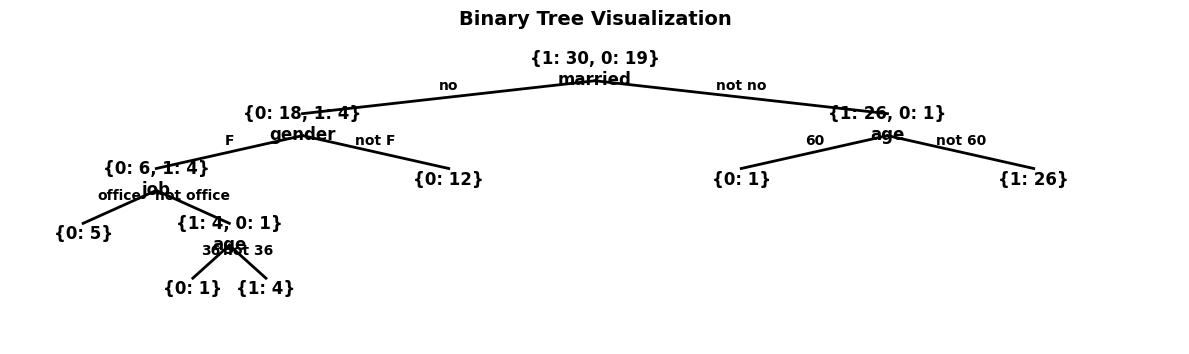

0

In [44]:
class Node:
    def __init__(self, value_counts=None):
        self.value_counts = value_counts or {}
        
        self.is_leaf = False
        self.prediction = None
        
        # 切分信息（内部节点用）
        self.feature_index = None
        self.threshold = None      # 对 0/1 特征，可以用 0.5
        self.left = None
        self.right = None
        

class DecisionTree:
    def __init__(self, criterion):
        self.criterion = criterion
    
    def _calculate_criteria(self, y: pd.DataFrame):
        n = len(y)
        counts = y.value_counts().values
        if self.criterion == "gini":
            G = 1 - np.sum((counts / n) ** 2)
        elif self.criterion == "entropy":
            G = -np.sum(((counts / n) * np.log2(counts / n)))
            
        return G
    
    def _best_split(self, X: pd.DataFrame, y: pd.DataFrame):
        data = []
        
        # X中的对于每个变量(feature)找出这个变量所有的值(value)
        for feature in X.columns:
            col = X[feature]
            values = col.unique()
            
            # 如果变量为连续变量
            if isinstance(values, (int, float, np.number)):
                values = np.sort(values)
                if len(values) == 1:
                    continue
                    
                thresholds = (values[:-1] + values[1:]) / 2.0
                for t in thresholds:
                    mask = (col < t)  # 这个feature中所有数值小于这个threshold的行
                    y_left, y_right = y[mask], y[~mask]
                    X_left, X_right = X[mask], X[~mask]
                    
                    if len(y_left) == 0 or len(y_right) == 0:
                        continue
                        
                    criteria_all = self._calculate_criteria(y)
                    criteria_left = self._calculate_criteria(y_left)
                    criteria_right = self._calculate_criteria(y_right)
                    
                    gain = criteria_all - len(y_left)/len(y) * criteria_left - len(y_right)/len(y) * criteria_right
                    data.append((feature, t, gain, (X_left, y_left, X_right, y_right)))
                    
            else:
                # 不为连续变量的变量
                for value in values:
                    mask = (col == value)  # 这个feature中所有数值等于这个value的行
                    y_left, y_right = y[mask], y[~mask]
                    X_left, X_right = X[mask], X[~mask]
                    
                    if len(y_left) == 0 or len(y_right) == 0:
                        continue
                    
                    criteria_all = self._calculate_criteria(y)
                    criteria_left = self._calculate_criteria(y_left)
                    criteria_right = self._calculate_criteria(y_right)
                    
                    # 计算gain，使用gain最高的分割
                    gain = criteria_all - len(y_left)/len(y) * criteria_left - len(y_right)/len(y) * criteria_right
                    data.append((feature, value, gain, (X_left, y_left, X_right, y_right)))
        
        if not data:
            return None, None, (None, None, None, None)

        best_set = max(data, key=lambda x: x[2])  # 最好的分割就是gain最高的
        best_feature, best_threshold, best_data = best_set[0], best_set[1], best_set[3]
        
        return best_feature, best_threshold, best_data
    
    
    def _tree_growing(self, X: pd.DataFrame, y: pd.DataFrame, depth=0):
        node = Node(y.value_counts().to_dict())
        
        if len(y.unique()) == 1:
            node.is_leaf = True
            node.prediction = y.iloc[0]
            return node
        
        best_feature, best_threshold, (X_left, y_left, X_right, y_right) = self._best_split(X, y)
        
        if best_feature is None:
            node.is_leaf = True
            node.prediction = y.value_counts().idxmax()
            return node
        
        node.feature_index = best_feature
        node.threshold = best_threshold
        node.left = self._tree_growing(X_left, y_left, depth+1)
        node.right = self._tree_growing(X_right, y_right, depth+1)
        
        return node

            
    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        return self._tree_growing(X, y)
    
    def predict(self, X: pd.DataFrame, tree):
        if tree.is_leaf:
            return tree.prediction
        for feature in X.columns:
            if feature == tree.feature_index:  # 如果找到了这个
                val = X[feature].item()
                if isinstance(val, (int, float, np.number)):  # 是定量变量
                    if val < tree.threshold:
                        return self.predict(X, tree.left)
                    else:
                        return self.predict(X, tree.right)
                
                else:  # 是定性变量
                    if val == tree.threshold:
                        return self.predict(X, tree.left)
                    else:
                        return self.predict(X, tree.right)
# print(tree.T.left.feature_index)
# print(tree.T.left.threshold)

def plot_tree(root):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')
    ax.axis('off')
    
    def get_tree_depth(node):
        if not node:
            return 0
        return 1 + max(get_tree_depth(node.left), get_tree_depth(node.right))
    
    def plot_node(node, x, y, dx, level):
        if not node:
            return
        
        # 绘制节点
        if not node.is_leaf:
            ax.text(x, y, f"{str(node.value_counts)}\n{node.feature_index}", ha='center', va='center', fontsize=12, fontweight='bold')
        else:
            ax.text(x, y, f"{str(node.value_counts)}", ha='center', va='center', fontsize=12, fontweight='bold')
        
        # 绘制左子树
        if node.left:
            x_left = x - dx
            y_left = y - 1.5
            ax.plot([x, x_left], [y-0.3, y_left+0.3], 'k-', lw=2)
            edge_mid_x = (x + x_left) / 2
            edge_mid_y = (y-0.3 + y_left+0.3) / 2 + 0.3
            ax.text(edge_mid_x, edge_mid_y, node.threshold, 
                   ha='center', va='center', 
                   fontsize=10, fontweight='bold')
            plot_node(node.left, x_left, y_left, dx/2, level+1)
        
        # 绘制右子树
        if node.right:
            x_right = x + dx
            y_right = y - 1.5
            ax.plot([x, x_right], [y-0.3, y_right+0.3], 'k-', lw=2)
            edge_mid_x = (x + x_right) / 2
            edge_mid_y = (y-0.3 + y_right+0.3) / 2 + 0.3
            ax.text(edge_mid_x, edge_mid_y, f"not {node.threshold}", 
                   ha='center', va='center', 
                   fontsize=10, fontweight='bold')
            plot_node(node.right, x_right, y_right, dx/2, level+1)
    
    depth = get_tree_depth(root)
    plot_node(root, 0, 0, 2**(depth-2), 1)
    
    plt.xlim(-2**(depth-1), 2**(depth-1))
    plt.ylim(-depth*1.5, 1)
    plt.title('Binary Tree Visualization', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
        

clf = DecisionTree("gini")
tree = clf.fit(X, y)

test = pd.DataFrame({
    "age": [29],
    "income": [46],
    "hours": [31],
    "gender": ["F"],
    "job": ["office"],
    "married": ["no"]
})
plot_tree(tree)

clf.predict(test, tree)

## SVM

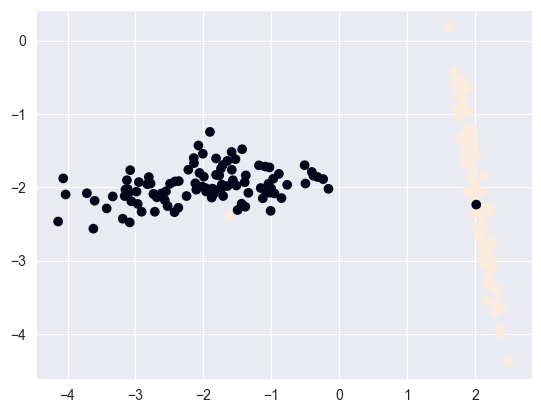

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=200,     # 样本数
    n_features=2,      # 特征维度
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,     # 类别分离度（越大越容易分）
    random_state=47
)

for i, label in enumerate(y):
    if label == 0:
        y[i] = -1

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

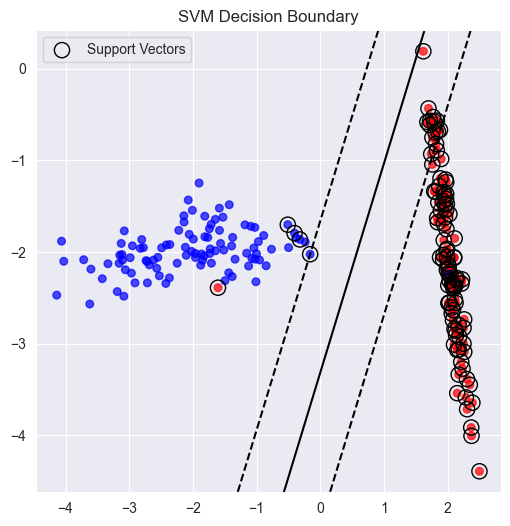

In [3]:
class SVM:
    def __init__(self, kernel, C, lr=1e-4, epochs=1000):
        # alpha : (200, 1)
        # y : (200, 1)
        # X : (200, 2)
        self.X = None
        self.y = None
        self.w = None
        self.b = None
        self.alpha = None
        self.kernel = kernel
        self.C = C
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        y = y.reshape(-1, 1)
        alpha = np.random.randn(X.shape[0], 1)
        
        for _ in range(self.epochs):
            K = X @ X.T
            Q = (y @ y.T) * K
            
            lag = -0.5 * np.sum((alpha @ alpha.T) * Q) + np.sum(alpha)
            grad_alpha = 1 - (alpha.T @ Q)
            alpha += self.lr * grad_alpha.T
            alpha = np.clip(alpha, 0, self.C)
            alpha -= (alpha.T @ y) / np.sum(y ** 2) * y
        
        self.alpha = alpha
        self.w = (alpha * y).T @ X
        self.b = y[0] - X[0] @ self.w.T
    
    def predict(self, X):
         return X @ self.w.T + self.b
    
    def visualize(self):
        plt.figure(figsize=(6,6))
    
        # 绘制样本点
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y.flatten(), cmap='bwr', s=30, alpha=0.7)
    
        # 绘制支持向量
        sv = (self.alpha > 1e-6).flatten()
        plt.scatter(self.X[sv, 0], self.X[sv, 1], s=120, facecolors='none', edgecolors='k', label='Support Vectors')
    
        # 画出分界线
        x_min, x_max = plt.xlim()
        y_min, y_max = plt.ylim()
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
        plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--','-','--'], colors='k')
    
        plt.title("SVM Decision Boundary")
        plt.legend()
        plt.show()

svm = SVM("l", 5)
svm.fit(X, y)
svm.visualize()

In [108]:
svm.predict(X[100])

array([1.31402888])